In [17]:
import torch 
from torch.utils.data import DataLoader
from torchvision import datasets,io,transforms
from torchvision.models.mobilenetv3 import *
from torchvision.models import MobileNet_V3_Small_Weights
from torchvision.models import vgg11
from torch import nn
import matplotlib.pyplot as plt
import timeit
import os
import random

In [18]:
#device agnostic code
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [19]:
#Data Transform
data_tr=transforms.Compose([transforms.Resize(size=(224,224)),transforms.ToTensor()])

In [20]:
#Creating Dataset
train_data=datasets.ImageFolder(root=r'C:\Users\Sudip\Desktop\New folder\Data\Train data',transform=data_tr)
test_data=datasets.ImageFolder(root=r'C:\Users\Sudip\Desktop\New folder\Data\Test data',transform=data_tr)
Classes=train_data.classes
Classes

['Bandhani', 'Ilkal', 'Kasavu', 'Sambalpuri']

In [21]:
#Creating dataloader
Batch_size=32
Train_dataloader=DataLoader(train_data,Batch_size,shuffle=True)
Test_dataloader=DataLoader(test_data,Batch_size,shuffle=True)

In [22]:
#Using MobileNetv3
model_0=vgg11(weights=None)
model_0.classifier[6]=nn.Linear(in_features=4096,out_features=4,bias=True)
model_0.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

In [23]:
#loss function & optimiser
loss_fn=torch.nn.CrossEntropyLoss()
optim=torch.optim.Adam(params=model_0.parameters(),lr=0.001)

Epoch:0| Train accuracy:0.5122704802259886|Train loss:2.8244099437685337|Test acc:0.5043154761904762|Test loss:1.1253291030724843
Epoch:1| Train accuracy:0.7063912429378532|Train loss:0.7780412480992785|Test acc:0.8072916666666666|Test loss:0.5817057902614275
Epoch:2| Train accuracy:0.815354284369115|Train loss:0.50660735905423|Test acc:0.8191964285714286|Test loss:0.5475798338651657
Epoch:3| Train accuracy:0.8597575329566854|Train loss:0.38755729213609535|Test acc:0.8223214285714285|Test loss:0.5798454364140828
Epoch:4| Train accuracy:0.8834745762711864|Train loss:0.33766014563014446|Test acc:0.8546130952380953|Test loss:0.3716267988085747
Total time:211.23158669999998


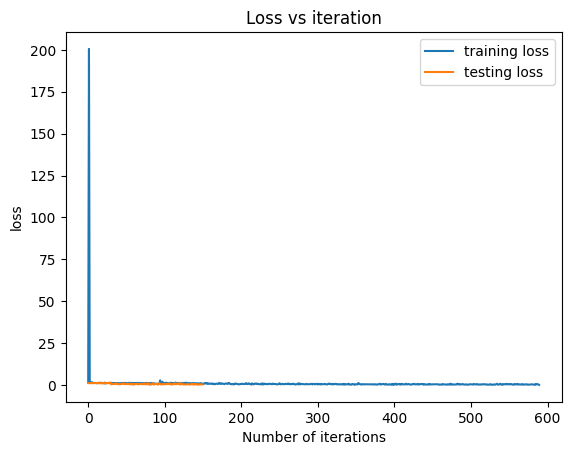

In [24]:
#Training and Testing
NUM_EPOCHS=5
st=timeit.default_timer()
train_loss_trend=[]
test_loss_trend=[]
train_loss_ep=[]
test_loss_ep=[]
for epoch in range(NUM_EPOCHS):
    #turning on training mode
    train_loss,train_acc,test_loss,test_acc,=0,0,0,0
    model_0.train()
    for batch, (X,y) in enumerate(Train_dataloader):
        #moving data to GPU
        X,y=X.to(device),y.to(device)
        y_=model_0(X)
        #calculating and storing loss
        loss=loss_fn(y_,y)
        train_loss += loss.item()
        train_loss_trend.append(loss.item())
        optim.zero_grad()#necessary
        #backpropagation
        loss.backward()
        #step ahead with optimisation
        optim.step()
        #prediction accuracy
        y_pred_class = torch.argmax(torch.softmax(y_, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_)
    #turing on testing mode
    model_0.eval()
    with torch.inference_mode():
        for batch, (X,y) in enumerate(Test_dataloader):
            X,y=X.to(device),y.to(device)
            y_=model_0(X)
            loss=loss_fn(y_,y)
            test_loss += loss.item()
            test_loss_trend.append(loss.item())
            y_pred_class = torch.argmax(torch.softmax(y_, dim=1), dim=1)
            test_acc += (y_pred_class == y).sum().item()/len(y_)
    train_loss,train_acc,test_loss,test_acc=train_loss/len(Train_dataloader),train_acc/len(Train_dataloader),test_loss/len(Test_dataloader),test_acc/len(Test_dataloader)
    train_loss_ep.append(train_loss)
    test_loss_ep.append(test_loss)
    print(f"Epoch:{epoch}| Train accuracy:{train_acc}|Train loss:{train_loss}|Test acc:{test_acc}|Test loss:{test_loss}")
ed=timeit.default_timer()
print(f"Total time:{(ed-st)}")
plt.plot(train_loss_trend,label='training loss')
plt.plot(test_loss_trend,label='testing loss')
plt.title('Loss vs iteration')
plt.xlabel('Number of iterations')
plt.ylabel('loss')
plt.legend()

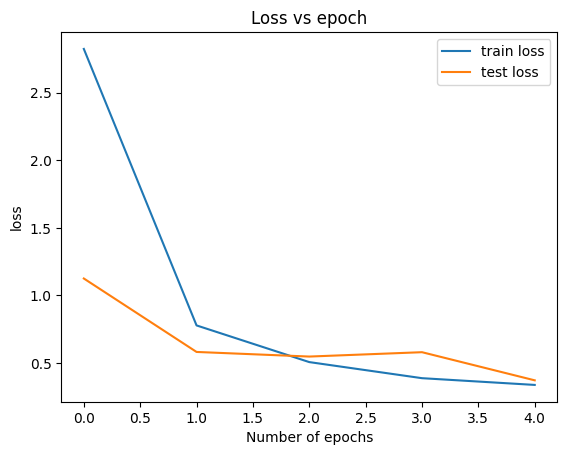

In [31]:
plt.plot(train_loss_ep,label='train loss')
plt.plot(test_loss_ep,label='test loss')
plt.title('Loss vs epoch')
plt.xlabel('Number of epochs')
plt.ylabel('loss')
plt.legend()

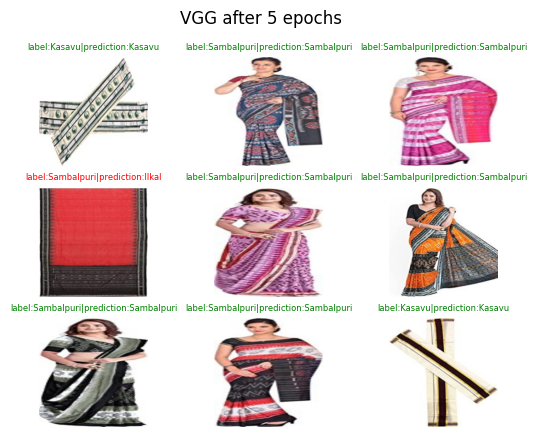

In [30]:
#Visualising the model
N=random.randint(0,1000)
Datlod=DataLoader(test_data,9,True)
(X,y)=next(iter(Datlod))
model_0.eval()
with torch.inference_mode():
    X=X.to(device)
    y=y.to(device)
    y_=torch.argmax(torch.softmax(model_0(X),dim=1),dim=1)
    for i in range(len(y)):
        if y_[i]==y[i]:
            plt.subplot(3,3,i+1)
            plt.imshow(X[i].to('cpu').squeeze().permute(1,2,0))
            plt.title(f"label:{Classes[y[i]]}|prediction:{Classes[y_[i]]}",color='g',fontsize=6)
            plt.axis(False)
        else:
            plt.subplot(3,3,i+1)
            plt.imshow(X[i].to('cpu').squeeze().permute(1,2,0))
            plt.title(f"label:{Classes[y[i]]}|prediction:{Classes[y_[i]]}",color='r',fontsize=6)
            plt.axis(False)
plt.suptitle(f"VGG after {NUM_EPOCHS} epochs")
plt.show()